# Kernel Machines

## Test multiclass SVM - without kernel

In [74]:
from metric import * 

X torch.Size([105, 2])
Y torch.Size([105])
torch.Size([105])
Training Accuracy: 49.52%
Test Accuracy: 40.00%
Precision - micro is  tensor(0.4000)
Precision - macro is  tensor(0.4505)
Precision -weight is  tensor(7.8559, dtype=torch.float64)
Recall - micro is  tensor(0.4000)
Recall - micro is  tensor(0.4211)
Recall -weight is  tensor(6.0000, dtype=torch.float64)
F1-score is  tensor(6.8036, dtype=torch.float64)


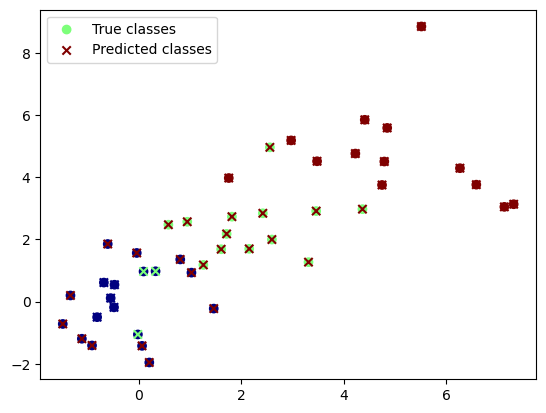

In [75]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from multiclass_svm import *

# Toy data
np.random.seed(42)
X = np.random.randn(150, 2)
y = np.repeat([0, 1, 2], 50)
X[y == 1] += 2.5
X[y == 2] += 5.0

########

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
print("X", X_train.size())
y_train = torch.tensor(y_train, dtype=torch.long)
print("Y", y_train.size())
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

model = MultiClassSVMKernel(input_dim=2, num_classes=3, C=1.0, f=(lambda x : x * x))
model.train(X_train, y_train, epochs=100)

train_predictions = model.predict(X_train)
print(train_predictions.size())
test_predictions = model.predict(X_test)


########

train_accuracy = torch.sum(train_predictions == y_train) / y_train.numel()
test_accuracy = torch.sum(test_predictions == y_test) / y_test.numel()

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


print("Precision - micro is ",precision_micro(num_classes=3, predict=test_predictions, truth=y_test))
print("Precision - macro is ",precision_macro(num_classes=3, predict=test_predictions, truth=y_test))
print("Precision -weight is ",precision_weight(num_classes=3, predict=test_predictions, truth=y_test))

print("Recall - micro is ",recall_micro(num_classes=3, predict=test_predictions, truth=y_test))
print("Recall - micro is ",recall_macro(num_classes=3, predict=test_predictions, truth=y_test))
print("Recall -weight is ",recall_weight(num_classes=3, predict=test_predictions, truth=y_test))

print("F1-score is ",f1score(num_classes=3, predict=test_predictions, truth=y_test, precision=precision_weight, recall=recall_weight))

# Visualize
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='jet', marker='o', label='True classes')
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_predictions, cmap='jet', marker='x', label='Predicted classes')
plt.legend()
plt.show()


